# Finding outliers with the mean and standard deviation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
def plot_boxplot_and_hist(data, variable):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    plt.show()

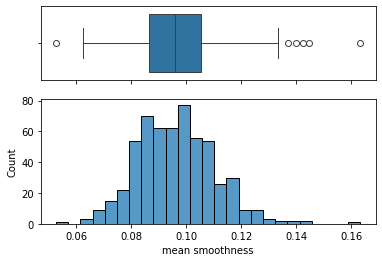

In [4]:
plot_boxplot_and_hist(X, "mean smoothness")

In [5]:
# mean plus 3 * std

def find_limits(df, variable, fold):
    var_mean = df[variable].mean()
    var_std = df[variable].std()
    lower_limit = var_mean - fold * var_std
    upper_limit = var_mean + fold * var_std
    return lower_limit, upper_limit

In [6]:
# we find the limits

lower_limit, upper_limit = find_limits(X, "mean smoothness", 3)
lower_limit, upper_limit

(0.05416789678205824, 0.13855266560809995)

In [7]:
# let's flag the outliers in the data set

outliers = np.where(
    (X["mean smoothness"] > upper_limit) | 
    (X["mean smoothness"] < lower_limit),
    True,
    False,
)

In [8]:
# how many outliers did we find?

outliers.sum()

5

In [9]:
def plot_boxplot_and_hist(data, variable):
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)
    
    plt.vlines(x=lower_limit, ymin=0, ymax=80, color='r')
    plt.vlines(x=upper_limit, ymin=0, ymax=80, color='r')

    plt.show()

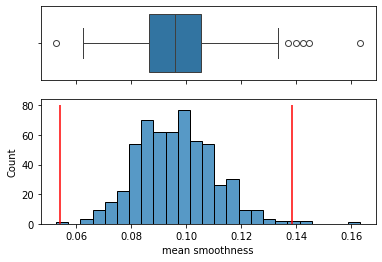

In [10]:
plot_boxplot_and_hist(X, "mean smoothness")

In [11]:
# we find the limits in another variable

lower_limit, upper_limit = find_limits(X, "worst texture", 3)
lower_limit, upper_limit

(7.238450329479068, 44.11599606770898)

In [12]:
# let's flag the outliers in the data set

outliers = np.where(
    (X["worst texture"] > upper_limit) |
    (X["worst texture"] < lower_limit),
    True,
    False,
)

In [13]:
# how many outliers did we find?

outliers.sum()

4

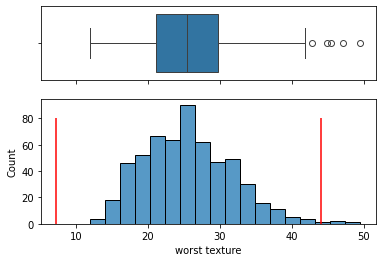

In [14]:
plot_boxplot_and_hist(X, "worst texture")